## 빅데이터 실습

### 제주도 핫플레이스 웹크롤링

### 셀레니움 사용

In [68]:
# 셀레니움 및 필요 라이브러리사용등록
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import unicodedata #유니코드 데이터 처리 모듈
import re # 정규식 처리 모듈
import time

In [69]:
driver = webdriver.Chrome()

##### 인스타그램 접속

In [70]:
# 인스타그램 접속
driver.get('https://www.instagram.com')
time.sleep(2.0)

##### 자동 로그인 처리
- 로그인 화면, 아이디, 패스워드 입력하는 html name 속성이 생김

In [71]:
# 인스타그램 사용자 이름(이메일)정보 입력
email = ''
input_id = driver.find_element(By.NAME, 'username')
input_id.clear()
input_id.send_keys(email)

# 인스타그램 비밀번호 입력
password = ''
input_pw = driver.find_element(By.NAME, 'password')
input_pw.clear()
input_pw.send_keys(password)
input_pw.submit()
time.sleep(2.0)

##### 태그로 검색하면 30개 이상 검색안됨
- 한 그룹의 게시물로 대체

In [72]:
## 검색결과 URL 함수
def searchInstagram(word):
    url = f'https://www.instagram.com/explore/tags/{word}'
    return url

In [73]:
## 24.03. 현재 태그로는 30개 이상 검색안됨
driver.get(searchInstagram('제주도맛집'))

In [8]:
##제주나드리 게시글로 검색
#https://www.instagram.com/jeju__nadri/
driver.get('https://www.instagram.com/jeju__nadri/')

##### 게시글 클릭 후 게시글 정보 가져오기

In [9]:
# 첫번째 게시물 클릭
first = driver.find_element(By.CLASS_NAME,'_aagw')
first.click()
time.sleep(2.0)

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"._aagw"}
  (Session info: chrome=122.0.6261.112); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x00007FF61106AD32+56930]
	(No symbol) [0x00007FF610FDF632]
	(No symbol) [0x00007FF610E942E5]
	(No symbol) [0x00007FF610ED98ED]
	(No symbol) [0x00007FF610ED9A2C]
	(No symbol) [0x00007FF610F1A967]
	(No symbol) [0x00007FF610EFBCDF]
	(No symbol) [0x00007FF610F181E2]
	(No symbol) [0x00007FF610EFBA43]
	(No symbol) [0x00007FF610ECD438]
	(No symbol) [0x00007FF610ECE4D1]
	GetHandleVerifier [0x00007FF6113E6ABD+3709933]
	GetHandleVerifier [0x00007FF61143FFFD+4075821]
	GetHandleVerifier [0x00007FF61143818F+4043455]
	GetHandleVerifier [0x00007FF611109766+706710]
	(No symbol) [0x00007FF610FEB90F]
	(No symbol) [0x00007FF610FE6AF4]
	(No symbol) [0x00007FF610FE6C4C]
	(No symbol) [0x00007FF610FD6904]
	BaseThreadInitThunk [0x00007FF8DA1E7344+20]
	RtlUserThreadStart [0x00007FF8DAE426B1+33]


In [74]:
## 게시글 정보 가져오기 함수
def getContent(driver):
    pass

In [ ]:
## 게시글 가져오기 로직
## 1. html 코드 가져오기
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

## 2. 팝업 본문내용 가져오기
content = soup.select('div.x9f619')[0].text

firstIndex = str(soup.select('div.x9f619')[0]).index('>')
lastIndex = str(soup.select('div.x9f619')[0]).index('<br/>')
shopName = str(soup.select('div.x9f619')[0])[firstIndex+1:lastIndex]

## 3. 본문에서 해시태그 가져오기(정규식 활용)
tags = re.findall(r'#[^\s#,\\n]+',content)
tags

## 4. 포스트 작성일자
# date = soup.select('time.x1p4m5qa')[0]['datetime'][:10]
# date

## 5. 좋아요 수 가져오기
like = soup.select('span.xdj266r.x11i5rnm.xat24cr')[3].text
like

## 6. 위치정보
# re.findall(r'')

[]

##### 현재 문제
- 인스타그램 화면 UI가 두 종류, 통일해서 코딩 불가

#### 워드 클라우드(Word Cloud)
- 태그 중에서 빈도수가 높은 태그는 크게 글자를 크게, 빈도수가 낮은 태그는 작게 표현해서 마치 구름처럼 나타내는 방법

In [75]:
## 판다스등 필요 라이브러리 사용등록
import pandas as pd

In [76]:
raw_total = pd.read_excel('./data/1_crawling_raw.xlsx')
raw_total['tags']

0       ['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가...
1       ['#제주핫플', '#제주여행', '#제주', '#제주도', '#제주도맛집', '#...
2       ['#honestin', '#어니스틴', '#제주여행', '#제주', '#제주도',...
3       ['#제주관광', '#제주살이', '#제주이주민', '#아라동주민', '#삼남매집'...
4       ['#제주관광', '#제주', '#돔나이트', '#스트레스', '#풀자', '#춤추...
                              ...                        
8796    ['#일상', '#구기자', '#티타임', '#2019', '#새해', '#차스타그...
8797    ['#제주', '#친정여행', '#겨울방학', '#제주여행앞머리는', '#친정찬스'...
8798                           ['#사진좀찍으시는님덕에건져또', '#이순간']
8799                                                   []
8800                            ['#HappyNewYearEveryone']
Name: tags, Length: 8801, dtype: object

In [77]:
##
raw_total['tags'][0][2:-2].split("', '")[1]

'#제주여행'

In [78]:
from tqdm import tqdm

In [79]:
tagAllList = []

for tags in tqdm(raw_total['tags']): # 8800개 반복
    tagList = tags[2:-2].split("', '") # 다시 리스트로
    for tag in tagList: # 갯수가 유동
        tagAllList.append(tag)

100%|██████████| 8801/8801 [00:00<00:00, 220170.88it/s]


In [80]:
tagAllList

['#제주핫플레이스',
 '#제주여행',
 '#제주여행',
 '#제주도여행',
 '#제주가볼만한곳',
 '#제주도핫플',
 '#제주여행코스',
 '#제주공항',
 '#제주도맛집',
 '#제주맛집',
 '#제주스냅',
 '#제주풍경',
 '#제주사진',
 '#제주카페',
 '#제주도카페',
 '#산굼부리',
 '#제주도바다',
 '#귤체험',
 '#우도',
 '#제주관광',
 '#제주도여향지',
 '#제주여행중',
 '#삼육오빠',
 '#제주앓이',
 '#제주핫플',
 '#제주여행',
 '#제주',
 '#제주도',
 '#제주도맛집',
 '#제주맛집',
 '#여행',
 '#제주맛집추천',
 '#맛집추천',
 '#제주공항',
 '#제주카페',
 '#제주디저트맛집',
 '#제주데이트',
 '#제주데이트코스',
 '#제주도여행',
 '#고집돌우럭',
 '#중문맛집',
 '#제주여행중',
 '#감귤카페',
 '#제주카페추천',
 '#제주야시장',
 '#맛집',
 '#제주갈만한곳',
 '#제주관광',
 '#좋아요반사',
 '#좋반',
 '#제주도여행지',
 '#제주도가볼만한곳',
 '#제주여행코스',
 '#honestin',
 '#어니스틴',
 '#제주여행',
 '#제주',
 '#제주도',
 '#제주도여행',
 '#제주살이',
 '#제주도민',
 '#제주가볼만한곳',
 '#제주일상',
 '#제주도가볼만한곳',
 '#제주핫플레이스',
 '#제주핫플',
 '#제주라이프',
 '#가을제주',
 '#제주시',
 '#제주여행코스',
 '#제주도핫플',
 '#제주오름',
 '#들렁모루',
 '#비밀의정원',
 '#삼굼부리',
 '#정물오름',
 '#자연생태마을',
 '#오조포구',
 '#올레길',
 '#제주하늘',
 '#제주관광',
 '#11월여행',
 '#제주관광',
 '#제주살이',
 '#제주이주민',
 '#아라동주민',
 '#삼남매집',
 '#새해첫날',
 '#드라이브',
 '#명월국민학교',
 '#낙서',
 '#잡히면죽는다',
 '#제주관광',
 '#제주',
 '#돔나이트',

In [81]:
## 해시태그 출현 빈도
from collections import Counter

In [82]:
tagCounts = Counter(tagAllList)

In [83]:
tagCounts.most_common(50)

[('#제주맛집', 3750),
 ('#제주도맛집', 3467),
 ('#제주여행', 3204),
 ('#제주관광', 2898),
 ('#제주도', 2096),
 ('#제주', 1567),
 ('#제주도여행', 1555),
 ('#서귀포맛집', 1392),
 ('#제주도가볼만한곳', 1047),
 ('#서귀포', 872),
 ('#제주핫플레이스', 848),
 ('#jeju', 776),
 ('#제주흑돼지맛집', 730),
 ('#제주맛집추천', 728),
 ('#일상', 717),
 ('#제주도흑돼지', 713),
 ('#제주카페', 711),
 ('#제주도흑돼지맛집', 709),
 ('#제주흑돼지', 693),
 ('#협재맛집', 677),
 ('#성산일출봉', 674),
 ('#제주도민', 637),
 ('#제주도그램', 609),
 ('#서귀포흑돼지맛집', 605),
 ('', 588),
 ('#서귀포흑돼지', 582),
 ('#제주가볼만한곳', 580),
 ('#성산일출봉맛집', 567),
 ('#섭지코지', 558),
 ('#제주도민맛집', 542),
 ('#제주핫플', 530),
 ('#선팔', 522),
 ('#섭지코지맛집', 519),
 ('#제주살이', 516),
 ('#여행스타그램', 498),
 ('#통갈치구이', 495),
 ('#제주통갈치구이', 485),
 ('#제주서귀포맛집', 479),
 ('#제주반영구', 478),
 ('#중문맛집', 472),
 ('#제주눈썹문신', 472),
 ('#제주도관광', 471),
 ('#서귀포눈썹문신', 458),
 ('#여행', 455),
 ('#먹스타그램', 453),
 ('#제주시', 451),
 ('#반영구', 443),
 ('#눈썹문신', 443),
 ('#제주자연눈썹', 435),
 ('#제주속눈썹', 435)]

In [84]:
## 막잡 이외의 해시태그는 제외, 워드클라우드 결과보고 다시 필요없는 해시태그 추가, 정제한뒤
STOPWORDS = ['#제주도', '#제주', '#jeju', '#제주시', '#일상', '#제주도민', '#반영구', '#눈썹문신', 
            '#제주자연눈썹', '#제주속눈썹', '', '#서귀포', '#제주도그램', '#선팔', '#제주살이', '#여행스타그램',
            '#제주반영구', '#제주눈썹문신', '#서귀포눈썹문신', '#서귀포남자눈썹문신', '#서귀포자연눈썹',
            '#제주남자눈썹문신', '#서귀포속눈썹', '#서귀포반영구', '#제주스타그램', '#소통', '#맞팔', '#제주메이크업',
            '#daily', '#가족여행', '#jejuisland', '#제주속눈썹연장', '#제주해안도로', '#셀카', '#제주공항',
            '#서귀포문신', '#데일리', '#제주문신']

tagFilterList = []
for tag in tagAllList:
    if tag not in STOPWORDS: # 제외시킬 단어에 속하지 않으면
        tagFilterList.append(tag)

In [85]:
tagFilterCounts = Counter(tagFilterList)
tagFilterCounts.most_common(50)

[('#제주맛집', 3750),
 ('#제주도맛집', 3467),
 ('#제주여행', 3204),
 ('#제주관광', 2898),
 ('#제주도여행', 1555),
 ('#서귀포맛집', 1392),
 ('#제주도가볼만한곳', 1047),
 ('#제주핫플레이스', 848),
 ('#제주흑돼지맛집', 730),
 ('#제주맛집추천', 728),
 ('#제주도흑돼지', 713),
 ('#제주카페', 711),
 ('#제주도흑돼지맛집', 709),
 ('#제주흑돼지', 693),
 ('#협재맛집', 677),
 ('#성산일출봉', 674),
 ('#서귀포흑돼지맛집', 605),
 ('#서귀포흑돼지', 582),
 ('#제주가볼만한곳', 580),
 ('#성산일출봉맛집', 567),
 ('#섭지코지', 558),
 ('#제주도민맛집', 542),
 ('#제주핫플', 530),
 ('#섭지코지맛집', 519),
 ('#통갈치구이', 495),
 ('#제주통갈치구이', 485),
 ('#제주서귀포맛집', 479),
 ('#중문맛집', 472),
 ('#제주도관광', 471),
 ('#여행', 455),
 ('#먹스타그램', 453),
 ('#제주일상', 424),
 ('#애월맛집', 410),
 ('#제주시맛집', 387),
 ('#카멜리아힐', 384),
 ('#중문흑돼지맛집', 377),
 ('#제주도여행코스', 361),
 ('#제주도카페', 354),
 ('#성산맛집', 342),
 ('#좋아요', 318),
 ('#서귀포맛집추천', 315),
 ('#첫줄', 311),
 ('#한림맛집', 308),
 ('#제주공항근처맛집', 307),
 ('#제주공항맛집', 275),
 ('#오설록', 247),
 ('#제주도맛집추천', 246),
 ('#제주도이색맛집', 240),
 ('#서귀포여행', 238),
 ('#서귀포카페', 233)]

In [86]:
##### 시각화 라이브러리 사용등록
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
# 한글 깨짐 문제 해결
from matplotlib import rcParams, font_manager,rc

font_path = 'C:/windows/Fonts/NanumGothicCoding.ttf'#나눔고딕체 사용
font = font_manager.FontProperties(fname=font_path).get_name() #실제 설치된 폰트 이름조회
rc('font', family=font) #한글깨짐현상 해결!!
rcParams['axes.unicode_minus']=False #한글 사용시 마이너스 표시 깨짐 해결!

In [88]:
# 차트 스타일 지정
sns.set_style('darkgrid')

In [89]:
dfTagCounts = pd.DataFrame(tagFilterCounts.most_common(30))

In [90]:
dfTagCounts.columns = ['tag', 'counts']

In [91]:
## 불필요한 경고 메시지 제거
import warnings
warnings.filterwarnings('ignore')

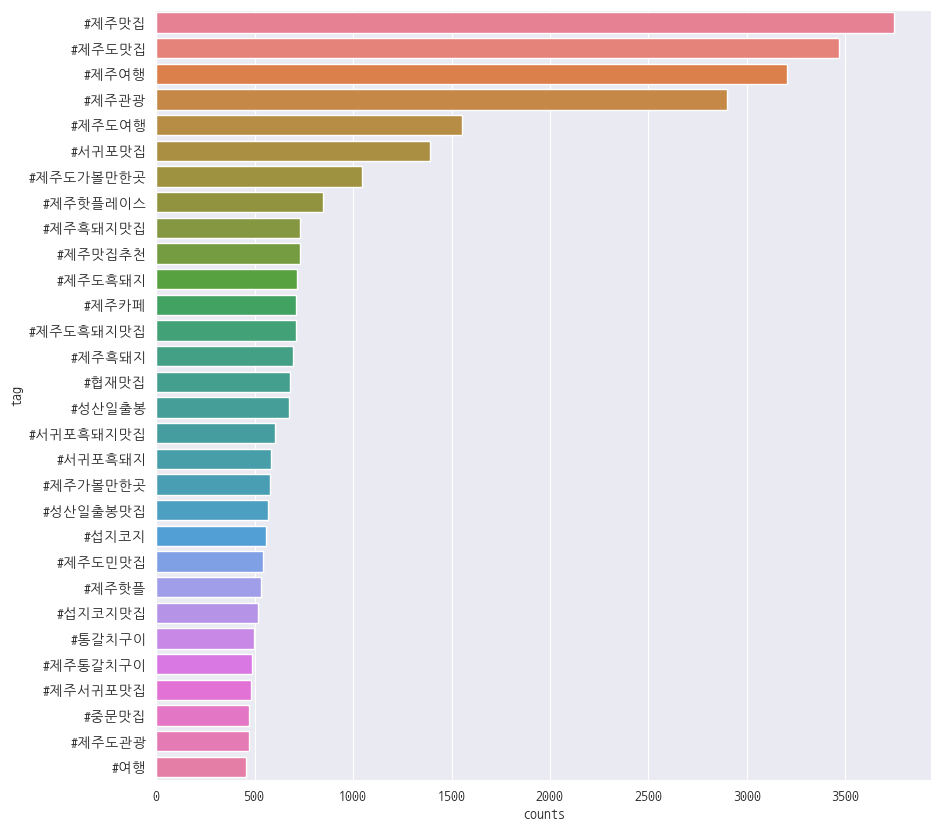

In [94]:
## 막대차트
plt.figure(figsize=(10,10))
##palette 종류 : pastel, husl, hls, Set2, Paired, rocket, rocket_r, mako
sns.barplot(x='counts', y='tag', data=dfTagCounts, palette='husl')
plt.show()

In [95]:
!pip install wordcloud

In [96]:
# 워드 클라우드 라이브러리 사용등록
from wordcloud import WordCloud


In [97]:
import platform

if platform.system() =='Windows':
    fontPath = 'C:/Windows/Fonts/NanumGothic.ttf'
elif platform.system() == 'Darwin': #macos
    fontPath = '/Users/$USER/Library/Fonts/AppleGothic.ttf'

In [98]:
sns.set_style('white')

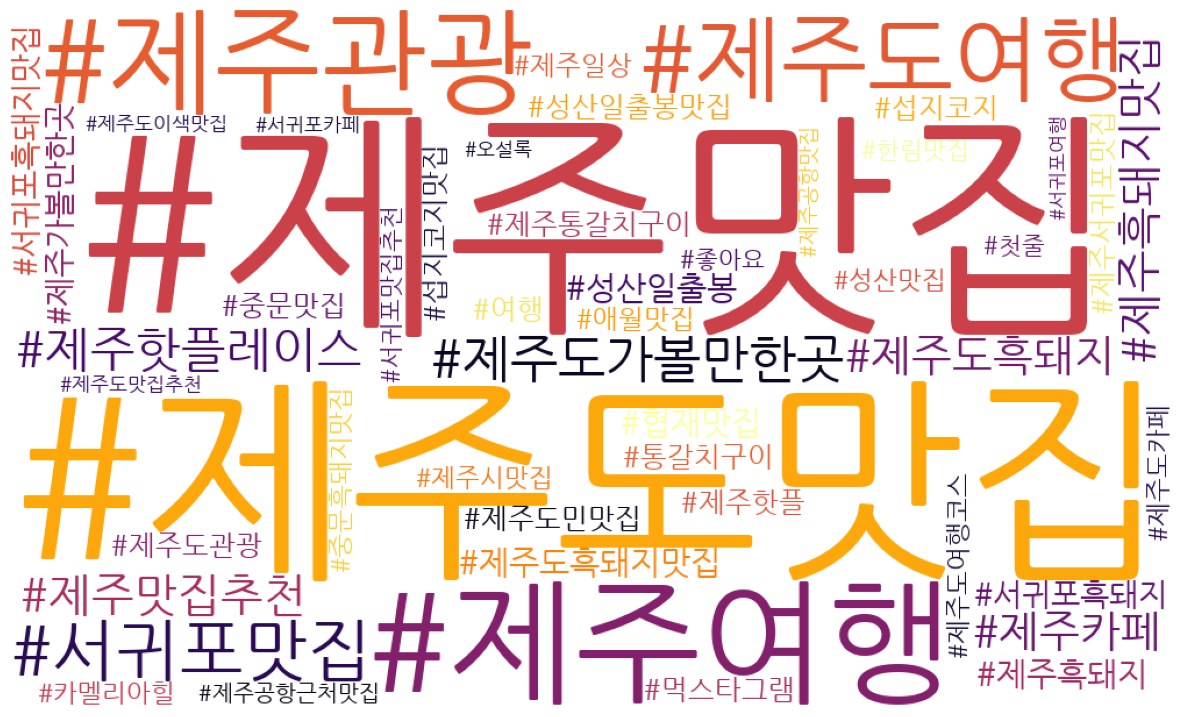

In [99]:
#워드 클라우드 만들기
tagsLast = dict(tagFilterCounts.most_common(50))
wc= WordCloud(font_path=fontPath, colormap='inferno',
              relative_scaling=0.4, width=1000, height=600,
              background_color='white', max_words=100).generate_from_frequencies(tagsLast)
plt.figure(figsize=(15,10))
plt.imshow(wc)
plt.axis('off')# x,y좌표 숨김
plt.show()

##### 글자체 변경
- 경기천년체 'https://www.gg.go.kr/contents/contents.do?ciIdx=679&menuId=2457'

In [100]:
# 폰트 경로 변경
if platform.system() =='Windows':
    fontPath = 'C:/Windows/Fonts/경기천년제목_Bold.ttf'
elif platform.system() == 'Darwin': #macos
    fontPath = '/Users/$USER/Library/Fonts/AppleGothic.ttf'

In [104]:
import numpy as np
from PIL import Image, ImageOps

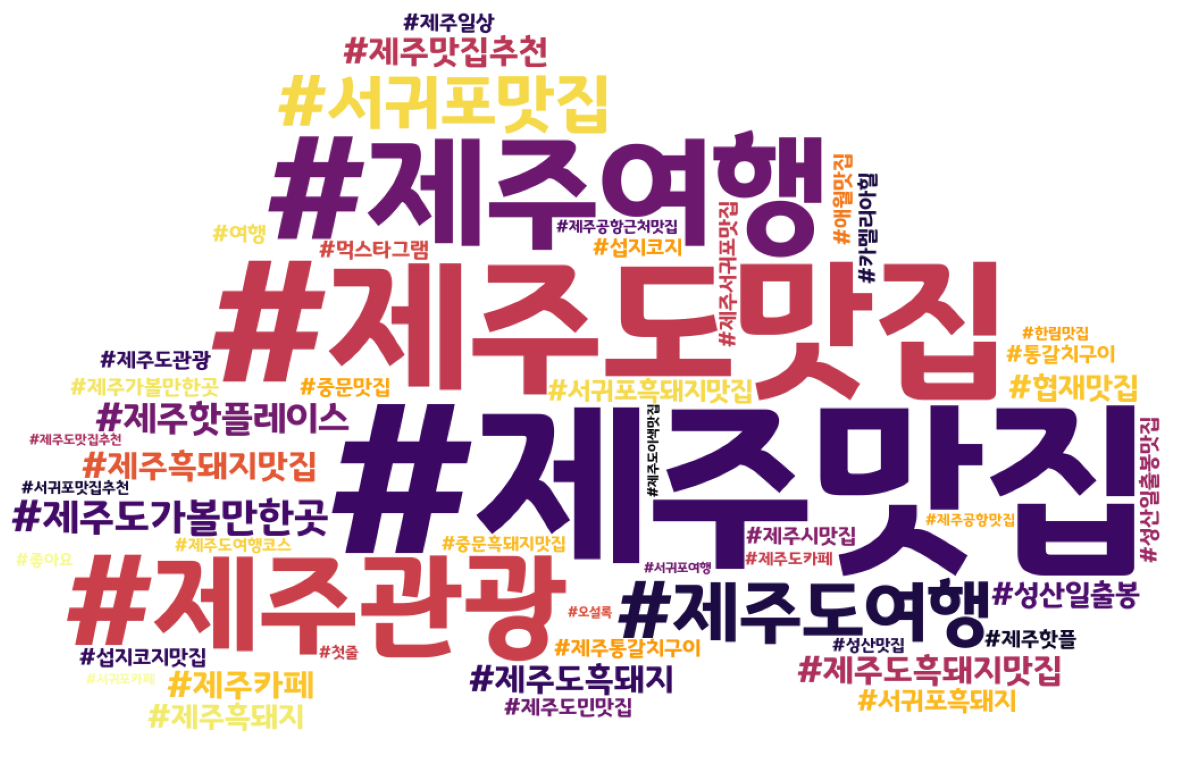

In [112]:
#워드 클라우드 다시
tagsLast = dict(tagFilterCounts.most_common(50))

mask = np.array(Image.open('./data/cloud.png'))
mask[mask.sum(axis=2) == 0] = 255 # 마스크이미지를 여백이 255가 되도록 변환

wc= WordCloud(font_path=fontPath, colormap='inferno', mask=mask,
              relative_scaling=0.4, width=1000, height=600,
              background_color='white', max_words=100).generate_from_frequencies(tagsLast)
plt.figure(figsize=(15,10))
plt.imshow(wc)
plt.axis('off')# x,y좌표 숨김
plt.savefig('./data/제주맛집_워드클라우드.png') # 이미지 파일 저장
plt.show()

#### 지도 시각화
- Filium 사용

##### 주소에 대한 위경도 값 가져오기
- 카카오 검색 API 사용
